In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model, model_from_json
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.python.keras.optimizers import Adam
from scipy.misc.pilutil import toimage
import matplotlib.pyplot as plt
import numpy as np

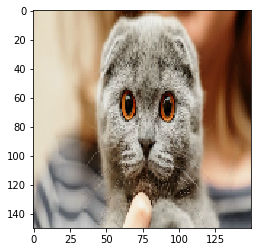

In [8]:
image_file_name = 'brit_cat.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img);

In [9]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [11]:
# Загружаем данные об архитектуре сети из файла json
json_file = open("Results/dogs_vs_cats_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("Results/dogs_vs_cats_model.h5")

In [12]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [62]:
activation_model = Model(inputs=loaded_model.input, outputs=loaded_model.layers[6].output)

In [63]:
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
__________

In [64]:
activation = activation_model.predict(img_array)

In [65]:
print(activation.shape)

(1, 34, 34, 64)


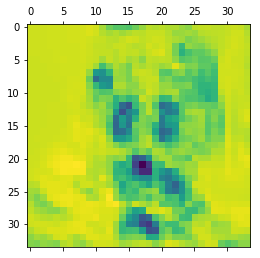

In [66]:
plt.matshow(activation[0, :, :, 18], cmap='viridis')

In [67]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [68]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [69]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

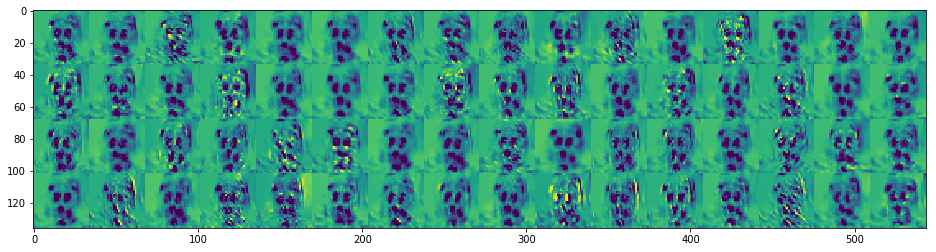

In [70]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis');